#### Mario Lemieux Stats and Awards

In [4]:
# imports
import pandas as pd
import numpy as np
import zipfile
import os
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.style as style 
from sklearn.impute import SimpleImputer

**Hall of Fame dataframe**

In [5]:
# read hall of fame csv file
hof = pd.read_csv('data/HOF.csv')

In [6]:
# check if Mario Lemieux has been admitted to the hall of fame 
hof.loc[hof['name']=='Mario Lemieux'] 

,year,hofID,name,category
306,1997,lemiema01h,Mario Lemieux,Player


**Player awards**

In [7]:
# read awards csv file
awards = pd.read_csv('data/AwardsPlayers.csv')

In [8]:
# observe the awards given to Lemieux
lemieux_awards = awards.loc[awards['playerID'] == 'lemiema01'] 
lemieux_awards

,playerID,award,year,lgID,note,pos
1072,lemiema01,All-Rookie,1984,NHL,NaN,C
1077,lemiema01,Calder,1984,NHL,NaN,NaN
1122,lemiema01,Pearson,1985,NHL,NaN,NaN
1127,lemiema01,Second Team All-Star,1985,NHL,NaN,C
1156,lemiema01,Second Team All-Star,1986,NHL,NaN,C
1169,lemiema01,Art Ross,1987,NHL,NaN,NaN
1174,lemiema01,First Team All-Star,1987,NHL,NaN,C
1178,lemiema01,Hart,1987,NHL,NaN,NaN
1185,lemiema01,Pearson,1987,NHL,NaN,NaN
1201,lemiema01,Art Ross,1988,NHL,NaN,NaN


**Master dataframe**

In [9]:
# read master csv file
master = pd.read_csv('data/Master.csv')

In [10]:
master.columns

Index(['playerID', 'coachID', 'hofID', 'firstName', 'lastName', 'nameNote',
       'nameGiven', 'nameNick', 'height', 'weight', 'shootCatch', 'legendsID',
       'ihdbID', 'hrefID', 'firstNHL', 'lastNHL', 'firstWHA', 'lastWHA', 'pos',
       'birthYear', 'birthMon', 'birthDay', 'birthCountry', 'birthState',
       'birthCity', 'deathYear', 'deathMon', 'deathDay', 'deathCountry',
       'deathState', 'deathCity'],
      dtype='object')

In [14]:
# see player's stats
lemieux_stats = master.loc[master['playerID'] == 'lemiema01']
lemieux_stats

,playerID,coachID,hofID,firstName,lastName,nameNote,nameGiven,nameNick,height,weight,...,birthDay,birthCountry,birthState,birthCity,deathYear,deathMon,deathDay,deathCountry,deathState,deathCity
4024,lemiema01,NaN,lemiema01h,Mario,Lemieux,NaN,Mario,The Magnificent,76.0,230.0,...,5.0,Canada,QC,Montreal,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# check out the birth year
lemieux_stats['birthYear']

4024    1965.0
Name: birthYear, dtype: float64

In [16]:
# the player is 56 y.o.
age = 2021 - lemieux_stats['birthYear']
age

4024    56.0
Name: birthYear, dtype: float64

**Scoring**


In [17]:
# read scoring csv file
scoring = pd.read_csv('data/Scoring.csv')

In [18]:
pd.options.display.float_format = '{:.1f}'.format

In [19]:
# wayne gretzky holds a record with 215 points earned in a year
scoring.loc[scoring['Pts'] == 215]

,playerID,year,stint,tmID,lgID,pos,GP,G,A,Pts,...,PostA,PostPts,PostPIM,Post+/-,PostPPG,PostPPA,PostSHG,PostSHA,PostGWG,PostSOG
14888,gretzwa01,1985,1,EDM,NHL,C,80.0,52.0,163.0,215.0,...,11.0,19.0,2.0,0.0,4.0,NaN,1.0,NaN,2.0,42.0


In [20]:
# observe stats scoring stats related to the player
lemieux_score = scoring.loc[scoring['playerID'] == 'lemiema01']
lemieux_score

,playerID,year,stint,tmID,lgID,pos,GP,G,A,Pts,...,PostA,PostPts,PostPIM,Post+/-,PostPPG,PostPPA,PostSHG,PostSHA,PostGWG,PostSOG
23605,lemiema01,1984,1,PIT,NHL,C,73.0,43.0,57.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23606,lemiema01,1985,1,PIT,NHL,C,79.0,48.0,93.0,141.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23607,lemiema01,1986,1,PIT,NHL,C,63.0,54.0,53.0,107.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23608,lemiema01,1987,1,PIT,NHL,C,77.0,70.0,98.0,168.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23609,lemiema01,1988,1,PIT,NHL,C,76.0,85.0,114.0,199.0,...,7.0,19.0,16.0,-1.0,7.0,3.0,1.0,0.0,0.0,41.0
23610,lemiema01,1989,1,PIT,NHL,C,59.0,45.0,78.0,123.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23611,lemiema01,1990,1,PIT,NHL,C,26.0,19.0,26.0,45.0,...,28.0,44.0,16.0,14.0,6.0,13.0,2.0,0.0,0.0,93.0
23612,lemiema01,1991,1,PIT,NHL,C,64.0,44.0,87.0,131.0,...,18.0,34.0,2.0,6.0,8.0,10.0,2.0,0.0,5.0,69.0
23613,lemiema01,1992,1,PIT,NHL,C,60.0,69.0,91.0,160.0,...,10.0,18.0,10.0,2.0,3.0,6.0,1.0,0.0,1.0,40.0
23614,lemiema01,1993,1,PIT,NHL,C,22.0,17.0,20.0,37.0,...,3.0,7.0,2.0,-4.0,1.0,1.0,0.0,0.0,0.0,23.0


In [21]:
# maximum number of points scored in a year
lemieux_score['Pts'].max()

199.0

In [22]:
# average goals in a year
statistics.mean(lemieux_score['G'])

40.588235294117645

In [23]:
# average +/- score in a year
statistics.mean(lemieux_score['+/-'])

6.764705882352941

In [24]:
# average assists in a year
statistics.mean(lemieux_score['A'])

60.76470588235294

In [25]:
# average games played in a season
statistics.mean(lemieux_score['GP'])

53.8235294117647

**Engineering Features**

In [36]:
# engineer a column of number of goals out of games played
pd.options.mode.chained_assignment = None  # default='warn'
lemieux_score['G/GP'] = lemieux_score.apply(lambda x: x['G'] if x['G'] < 1 else x['G']/x['GP'], axis=1)
lemieux_score['G/GP'].max()

1.15

In [37]:
# average goals per game
statistics.mean(lemieux_score['G/GP'])

0.687041349840491

In [38]:
# engineer a column of number of assists out of games played
pd.options.mode.chained_assignment = None  # default='warn'
lemieux_score['A/GP'] = lemieux_score.apply(lambda x: x['A'] if x['A'] < 1 else x['A']/x['GP'], axis=1)
lemieux_score['A/GP'].max()

1.5166666666666666

In [39]:
# engineer a column of number of assists out of games played
pd.options.mode.chained_assignment = None  # default='warn'
lemieux_score['Pts/GP'] = lemieux_score.apply(lambda x: x['Pts'] if x['Pts'] < 1 else x['Pts']/x['GP'], axis=1)
lemieux_score['Pts/GP'].max()

2.6666666666666665

In [40]:
# average goals up to 1997
up_to_1997 = lemieux_score.loc[lemieux_score['year'] <= 1997]
statistics.mean(up_to_1997['G/GP'])

0.8190506868270242

In [41]:
# average goals up starting 2000
from_2000 = lemieux_score.loc[lemieux_score['year'] >= 2000]
statistics.mean(from_2000['G/GP'])

0.3702189410728113

In [32]:
# average points per game
statistics.mean(lemieux_score['Pts/GP'])

1.7607608471478564

In [42]:
# average points up to 1997
statistics.mean(up_to_1997['Pts/GP'])

1.980788589417004

In [43]:
# average points starting 2000
statistics.mean(from_2000['Pts/GP'])

1.232694265701902

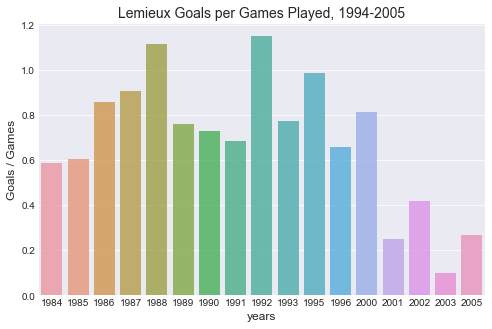

In [44]:
# construct goals vs games chart
style.use('seaborn-darkgrid')
style.use('seaborn-muted')
sns.set_palette(sns.dark_palette('#69d', 10))
plt.figure(figsize=(8,5))
sns.barplot(data=lemieux_score, x="year", y="G/GP", alpha=0.8)
plt.title('Lemieux Goals per Games Played, 1994-2005', fontsize=14)
plt.xlabel('years', fontsize=12)
plt.ylabel('Goals / Games', fontsize=12)
plt.show
plt.savefig('charts/GoalsVsGames');

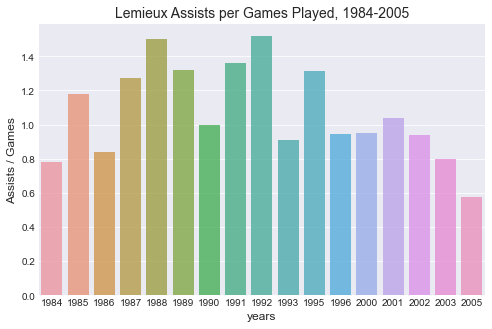

In [45]:
# construct assists vs games chart
style.use('seaborn-darkgrid')
style.use('seaborn-muted')
sns.set_palette(sns.dark_palette('#69d', 10))
plt.figure(figsize=(8,5))
sns.barplot(data=lemieux_score, x="year", y="A/GP", alpha=0.8)
plt.title('Lemieux Assists per Games Played, 1984-2005', fontsize=14)
plt.xlabel('years', fontsize=12)
plt.ylabel('Assists / Games', fontsize=12)
plt.show
plt.savefig('charts/AssistsVsGames');

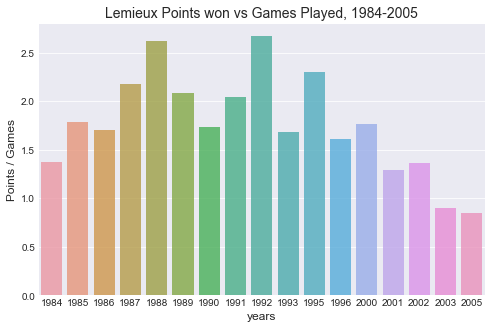

In [46]:
# construct pts vs games chart
style.use('seaborn-darkgrid')
style.use('seaborn-muted')
sns.set_palette(sns.dark_palette('#69d', 10))
plt.figure(figsize=(8,5))
sns.barplot(data=lemieux_score, x="year", y="Pts/GP", alpha=0.8)
plt.title('Lemieux Points won vs Games Played, 1984-2005', fontsize=14)
plt.xlabel('years', fontsize=12)
plt.ylabel('Points / Games', fontsize=12)
plt.show
plt.savefig('charts/PointsVsGames');

In [47]:
# average goals per game
statistics.mean(lemieux_score['G'] / lemieux_score['GP'])

0.687041349840491

In [48]:
# average assists per game
statistics.mean(lemieux_score['A'] / lemieux_score['GP'])

1.0737194973073654

In [49]:
statistics.mean(lemieux_score['Pts'] / lemieux_score['GP'])

1.7607608471478564

**Shootouts**

In [50]:
# read scoring shootouts csv file
shoot = pd.read_csv('data/ScoringShootout.csv')

In [51]:
# pd.options.display.float_format = '{:.2%}'.format

In [52]:
# filter stats related to Lemieux (the data only starts in 2005 and not enough to make any conclusions)
lemieux_shoot = shoot.loc[shoot['playerID'] == 'lemiema01']
lemieux_shoot

,playerID,year,stint,tmID,S,G,GDG
1020,lemiema01,2005,1,PIT,3,0,0


#### Pittsburgh Penguins Stats and Awards

**Postseason Series Wins & Losses**

In [53]:
# read series post csv file
series = pd.read_csv('data/SeriesPost.csv')

In [54]:
# see Penguins' wins
pit_wins = series.loc[series['tmIDWinner'] == 'PIT']
pit_wins.head()

,year,round,series,tmIDWinner,lgIDWinner,tmIDLoser,lgIDLoser,W,L,T,GoalsWinner,GoalsLoser,note
218,1969,QF,D,PIT,NHL,OAK,NHL,4,0,0,13,6,NaN
267,1974,Pre,C,PIT,NHL,STL,NHL,2,0,0,9,6,NaN
340,1978,Pre,D,PIT,NHL,BUF,NHL,2,1,0,9,9,NaN
490,1988,DSF,D,PIT,NHL,NYR,NHL,4,0,0,19,11,NaN
519,1990,DSF,C,PIT,NHL,NJD,NHL,4,3,0,21,21,NaN


In [55]:
# filter out years between 1984 - 2005
pit_wins = pit_wins.loc[pit_wins['year'] >= 1984]
pit_wins = pit_wins.loc[pit_wins['year'] <= 2005]
pit_wins.head()

,year,round,series,tmIDWinner,lgIDWinner,tmIDLoser,lgIDLoser,W,L,T,GoalsWinner,GoalsLoser,note
490,1988,DSF,D,PIT,NHL,NYR,NHL,4,0,0,19,11,NaN
519,1990,DSF,C,PIT,NHL,NJD,NHL,4,3,0,21,21,NaN
526,1990,DF,J,PIT,NHL,WAS,NHL,4,1,0,19,13,NaN
529,1990,CF,M,PIT,NHL,BOS,NHL,4,2,0,27,18,NaN
531,1990,SCF,O,PIT,NHL,MNS,NHL,4,2,0,28,16,NaN


In [57]:
# see Penguins' losses
pit_losses = series.loc[series['tmIDLoser'] == 'PIT']
pit_losses.head()

,year,round,series,tmIDWinner,lgIDWinner,tmIDLoser,lgIDLoser,W,L,T,GoalsWinner,GoalsLoser,note
220,1969,SF,F,STL,NHL,PIT,NHL,4,2,0,19,10,NaN
231,1971,QF,C,CHI,NHL,PIT,NHL,4,0,0,14,8,NaN
272,1974,QF,H,NYI,NHL,PIT,NHL,4,3,0,21,18,NaN
286,1975,Pre,D,TOR,NHL,PIT,NHL,2,1,0,8,3,NaN
306,1976,Pre,D,TOR,NHL,PIT,NHL,2,1,0,13,10,NaN


In [58]:
# filter out years between 1984 - 2005
pit_losses = pit_losses.loc[pit_losses['year'] >= 1984]
pit_losses = pit_losses.loc[pit_losses['year'] <= 2005]
pit_losses

,year,round,series,tmIDWinner,lgIDWinner,tmIDLoser,lgIDLoser,W,L,T,GoalsWinner,GoalsLoser,note
496,1988,DF,J,PHI,NHL,PIT,NHL,4,3,0,31,24,NaN
556,1992,DF,J,NYI,NHL,PIT,NHL,4,3,0,24,27,NaN
563,1993,CQF,B,WAS,NHL,PIT,NHL,4,2,0,20,12,NaN
586,1994,CSF,J,NJD,NHL,PIT,NHL,4,1,0,17,8,NaN
604,1995,CF,M,FLO,NHL,PIT,NHL,4,3,0,20,15,NaN
609,1996,CQF,C,PHI,NHL,PIT,NHL,4,1,0,20,13,NaN
623,1997,CQF,B,MTL,NHL,PIT,NHL,4,2,0,18,15,NaN
645,1998,CSF,I,TOR,NHL,PIT,NHL,4,2,0,18,14,NaN
660,1999,CSF,I,PHI,NHL,PIT,NHL,4,2,0,15,14,NaN
679,2000,CF,M,NJD,NHL,PIT,NHL,4,1,0,17,7,NaN


**Team Splits**

In [60]:
# read team splits csv file
team_splits = pd.read_csv('data/TeamSplits.csv')

In [61]:
pd.options.display.float_format = '{:.1f}'.format

In [62]:
# filter out PIT team stats
team_splits = team_splits.loc[team_splits['tmID'] == 'PIT']

In [63]:
# filter out years between 1984 and 2005
team_splits = team_splits.loc[team_splits['year'] >= 1984]
team_splits = team_splits.loc[team_splits['year'] <= 2005]
team_splits.head()

,year,lgID,tmID,hW,hL,hT,hOTL,rW,rL,rT,...,FebT,FebOL,MarW,MarL,MarT,MarOL,AprW,AprL,AprT,AprOL
825,1984,NHL,PIT,17,20,3.0,NaN,7,31,2.0,...,0.0,NaN,4.0,12.0,0.0,NaN,0.0,4.0,0.0,NaN
846,1985,NHL,PIT,20,15,5.0,NaN,14,23,3.0,...,1.0,NaN,3.0,9.0,1.0,NaN,1.0,3.0,0.0,NaN
867,1986,NHL,PIT,19,15,6.0,NaN,11,23,6.0,...,2.0,NaN,5.0,8.0,2.0,NaN,2.0,0.0,0.0,NaN
888,1987,NHL,PIT,22,12,6.0,NaN,14,23,3.0,...,0.0,NaN,9.0,5.0,0.0,NaN,2.0,0.0,0.0,NaN
909,1988,NHL,PIT,24,13,3.0,NaN,16,20,4.0,...,3.0,NaN,6.0,9.0,0.0,NaN,2.0,0.0,0.0,NaN


In [64]:
# engineer a column of home wins / losses
pd.options.mode.chained_assignment = None  # default='warn'
team_splits['hW/hL'] = team_splits.apply(lambda x: x['hW'] if x['hW'] < 1 else x['hW']/x['hL'], axis=1)

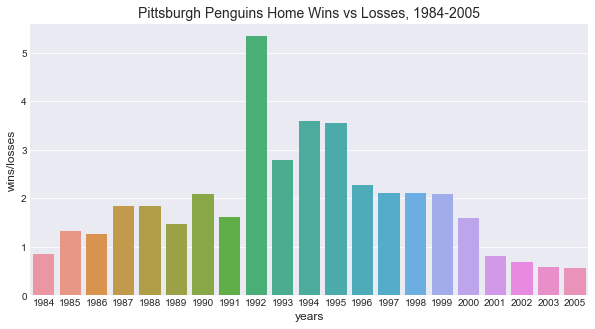

In [65]:
# construct home wins / losses chart
style.use('seaborn-darkgrid')
style.use('seaborn-muted')
sns.set_palette(sns.dark_palette('#69d', 10))
plt.figure(figsize=(10,5))
sns.barplot(data=team_splits, x="year", y="hW/hL")
plt.title('Pittsburgh Penguins Home Wins vs Losses, 1984-2005', fontsize=14)
plt.xlabel('years', fontsize=12)
plt.ylabel('wins/losses', fontsize=12)
plt.show
plt.savefig('charts/pit_home_winsloss');

In [66]:
# engineer a column of road wins / road losses
pd.options.mode.chained_assignment = None  # default='warn'
team_splits['rW/rL'] = team_splits.apply(lambda x: x['rW'] if x['rW'] < 1 else x['rW']/x['rL'], axis=1)

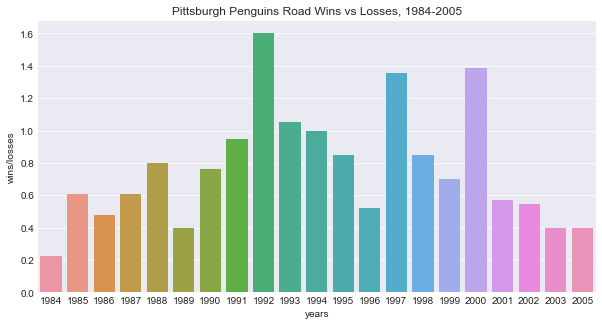

In [67]:
# construct home wins / losses chart
style.use('seaborn-darkgrid')
style.use('seaborn-muted')
sns.set_palette(sns.dark_palette('#69d', 10))
plt.figure(figsize=(10,5))
sns.barplot(data=team_splits, x="year", y="rW/rL")
plt.title('Pittsburgh Penguins Road Wins vs Losses, 1984-2005')
plt.xlabel('years')
plt.ylabel('wins/losses')
plt.show
plt.savefig('charts/pit_road_winsloss');

**Monthly Data**

In [68]:
# engineer a column of wins / losses by month
pd.options.mode.chained_assignment = None  # default='warn'
team_splits['SepW/SepL'] = team_splits.apply(lambda x: x['SepW'] if x['SepW'] < 1 or x['SepL'] < 1 else x['SepW']/x['SepL'], axis=1)
team_splits['OctW/OctL'] = team_splits.apply(lambda x: x['OctW'] if x['OctW'] < 1 or x['OctL'] < 1 else x['OctW']/x['OctL'], axis=1)
team_splits['NovW/NovL'] = team_splits.apply(lambda x: x['NovW'] if x['NovW'] < 1 or x['NovL'] < 1 else x['NovW']/x['NovL'], axis=1)
team_splits['DecW/DecL'] = team_splits.apply(lambda x: x['DecW'] if x['DecW'] < 1 or x['DecL'] < 1 else x['DecW']/x['DecL'], axis=1)
team_splits['JanW/JanL'] = team_splits.apply(lambda x: x['JanW'] if x['JanW'] < 1 or x['JanL'] < 1 else x['JanW']/x['JanL'], axis=1)
team_splits['FebW/FebL'] = team_splits.apply(lambda x: x['FebW'] if x['FebW'] < 1 or x['FebL'] < 1 else x['FebW']/x['FebL'], axis=1)
team_splits['MarW/MarL'] = team_splits.apply(lambda x: x['MarW'] if x['MarW'] < 1 or x['MarL'] < 1 else x['MarW']/x['MarL'], axis=1)
team_splits['AprW/AprL'] = team_splits.apply(lambda x: x['AprW'] if x['AprW'] < 1 or x['AprL'] < 1 else x['AprW']/x['AprL'], axis=1)


In [69]:
monthly_data = pd.DataFrame(data=team_splits, columns = ['year','OctW/OctL', 'NovW/NovL', 'DecW/DecL', 'JanW/JanL', 'FebW/FebL',
                                                        'MarW/MarL', 'AprW/AprL'])

In [70]:
# simple imputer missing values with the mean 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
monthly_data['OctW/OctL'] = imputer.fit_transform(monthly_data['OctW/OctL'].values.reshape(-1,1))
monthly_data['NovW/NovL'] = imputer.fit_transform(monthly_data['NovW/NovL'].values.reshape(-1,1))
monthly_data['DecW/DecL'] = imputer.fit_transform(monthly_data['DecW/DecL'].values.reshape(-1,1))
monthly_data['JanW/JanL'] = imputer.fit_transform(monthly_data['JanW/JanL'].values.reshape(-1,1))
monthly_data['FebW/FebL'] = imputer.fit_transform(monthly_data['FebW/FebL'].values.reshape(-1,1))
monthly_data['MarW/MarL'] = imputer.fit_transform(monthly_data['MarW/MarL'].values.reshape(-1,1))
monthly_data['AprW/AprL'] = imputer.fit_transform(monthly_data['AprW/AprL'].values.reshape(-1,1))

In [71]:
# average oct wins/ losses
statistics.mean(monthly_data['OctW/OctL'])

1.510595238095238

In [72]:
# average nov wins/ losses
statistics.mean(monthly_data['NovW/NovL'])

1.3647619047619048

In [73]:
# average dec wins/ losses
statistics.mean(monthly_data['DecW/DecL'])

1.768174603174603

In [74]:
# average Jan wins/ losses
statistics.mean(monthly_data['JanW/JanL'])

1.3614735793307222

In [75]:
# average Feb wins/ losses
statistics.mean(monthly_data['FebW/FebL'])

1.0033257747543463

In [76]:
# average March wins/ losses
statistics.mean(monthly_data['MarW/MarL'])

1.4166448630734345

In [77]:
# average Apr wins/ losses
statistics.mean(monthly_data['AprW/AprL'])

1.3973684210526316

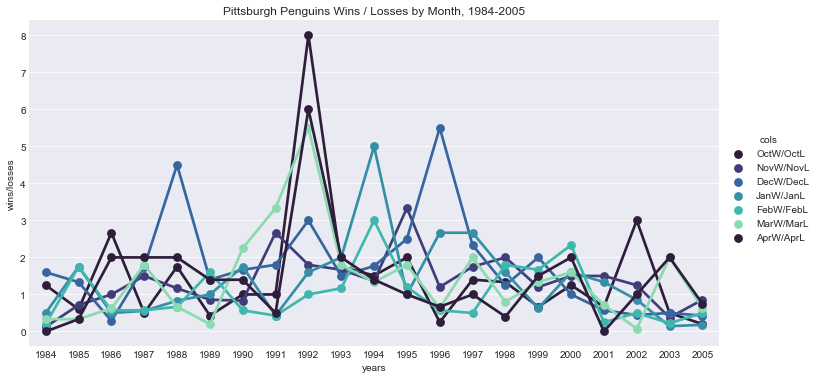

In [78]:
monthly_data = monthly_data.melt('year', var_name='cols', value_name='vals')

sns.catplot(x='year', y="vals", hue='cols', data=monthly_data, kind='point', height=5, aspect=2,
           palette=sns.color_palette('mako'))
plt.title('Pittsburgh Penguins Wins / Losses by Month, 1984-2005')
plt.xlabel('years')
plt.ylabel('wins/losses')
plt.show
plt.savefig('charts/pit_monthly_winslosses');

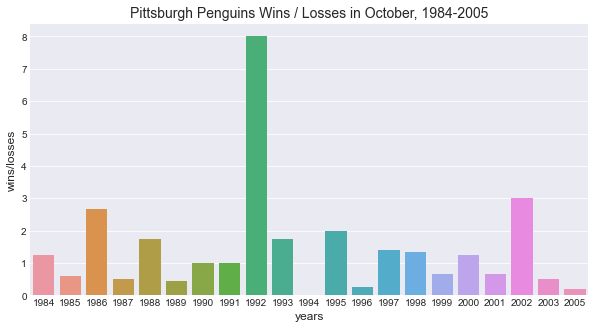

In [79]:
# construct home wins / losses chart for oct
style.use('seaborn-darkgrid')
style.use('seaborn-muted')
sns.set_palette(sns.dark_palette('#69d', 10))
plt.figure(figsize=(10,5))
sns.barplot(data=team_splits, x="year", y="OctW/OctL")
plt.title('Pittsburgh Penguins Wins / Losses in October, 1984-2005', fontsize=14)
plt.xlabel('years', fontsize=12)
plt.ylabel('wins/losses', fontsize=12)
plt.show
plt.savefig('charts/pit_oct_winslosses');

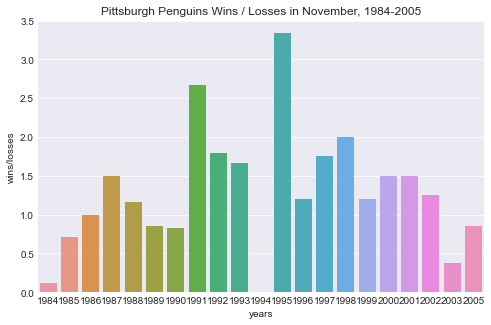

In [80]:
# construct home wins / losses chart for nov
style.use('seaborn-darkgrid')
style.use('seaborn-muted')
sns.set_palette(sns.dark_palette('#69d', 10))
plt.figure(figsize=(8,5))
sns.barplot(data=team_splits, x="year", y="NovW/NovL")
plt.title('Pittsburgh Penguins Wins / Losses in November, 1984-2005')
plt.xlabel('years')
plt.ylabel('wins/losses')
plt.show
plt.savefig('charts/pit_nov_winslosses');

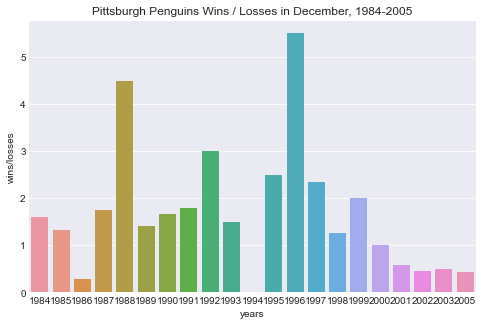

In [81]:
# construct home wins / losses chart for dec
style.use('seaborn-darkgrid')
style.use('seaborn-muted')
sns.set_palette(sns.dark_palette('#69d', 10))
plt.figure(figsize=(8,5))
sns.barplot(data=team_splits, x="year", y="DecW/DecL")
plt.title('Pittsburgh Penguins Wins / Losses in December, 1984-2005')
plt.xlabel('years')
plt.ylabel('wins/losses')
plt.show
plt.savefig('charts/pit_dec_winslosses');

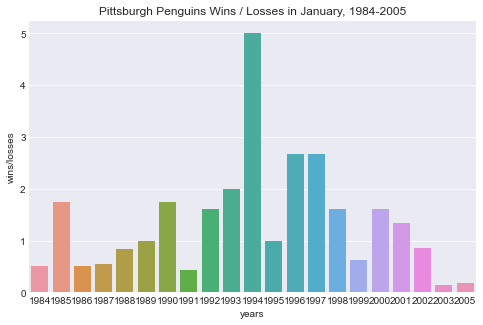

In [82]:
# construct home wins / losses chart for jan
style.use('seaborn-darkgrid')
style.use('seaborn-muted')
sns.set_palette(sns.dark_palette('#69d', 10))
plt.figure(figsize=(8,5))
sns.barplot(data=team_splits, x="year", y="JanW/JanL")
plt.title('Pittsburgh Penguins Wins / Losses in January, 1984-2005')
plt.xlabel('years')
plt.ylabel('wins/losses')
plt.show
plt.savefig('charts/pit_jan_winslosses');

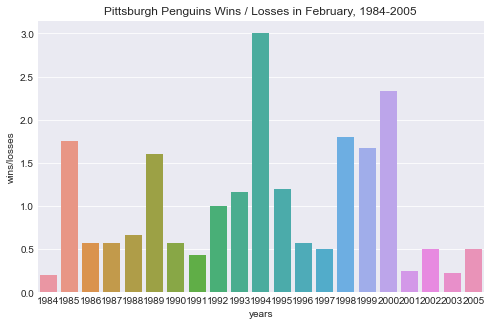

In [83]:
# construct home wins / losses chart for feb
style.use('seaborn-darkgrid')
style.use('seaborn-muted')
sns.set_palette(sns.dark_palette('#69d', 10))
plt.figure(figsize=(8,5))
sns.barplot(data=team_splits, x="year", y="FebW/FebL")
plt.title('Pittsburgh Penguins Wins / Losses in February, 1984-2005')
plt.xlabel('years')
plt.ylabel('wins/losses')
plt.show
plt.savefig('charts/pit_feb_winslosses');

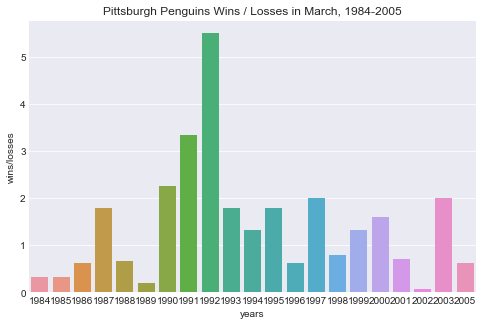

In [84]:
# construct home wins / losses chart for march
style.use('seaborn-darkgrid')
style.use('seaborn-muted')
sns.set_palette(sns.dark_palette('#69d', 10))
plt.figure(figsize=(8,5))
sns.barplot(data=team_splits, x="year", y="MarW/MarL")
plt.title('Pittsburgh Penguins Wins / Losses in March, 1984-2005')
plt.xlabel('years')
plt.ylabel('wins/losses')
plt.show
plt.savefig('charts/pit_mar_winslosses');

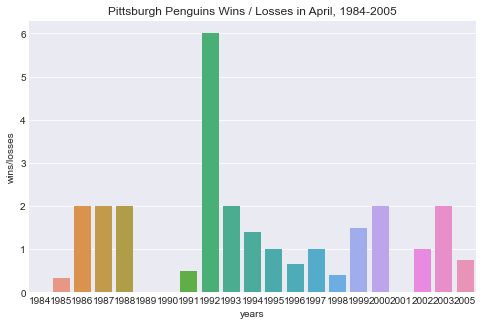

In [85]:
# construct home wins / losses chart for April
style.use('seaborn-darkgrid')
style.use('seaborn-muted')
sns.set_palette(sns.dark_palette('#69d', 10))
plt.figure(figsize=(8,5))
sns.barplot(data=team_splits, x="year", y="AprW/AprL")
plt.title('Pittsburgh Penguins Wins / Losses in April, 1984-2005')
plt.xlabel('years')
plt.ylabel('wins/losses')
plt.show
plt.savefig('charts/pit_apr_winslosses');

**Team vs Team Stats**

In [86]:
# read team vs team csv file
team_vs_team = pd.read_csv('data/TeamVsTeam.csv')

In [87]:
# explore Penguins' opponents
pit_team_stats = team_vs_team.loc[team_vs_team['tmID'] == 'PIT']
pit_team_stats.head()

,year,lgID,tmID,oppID,W,L,T,OTL
2505,1967,NHL,PIT,BOS,2,2,0.0,NaN
2506,1967,NHL,PIT,CHI,1,2,1.0,NaN
2507,1967,NHL,PIT,DET,1,3,0.0,NaN
2508,1967,NHL,PIT,LAK,4,6,0.0,NaN
2509,1967,NHL,PIT,MNS,4,3,3.0,NaN


In [88]:
# filter out years between 1984 and 2005
pit_team_stats = pit_team_stats.loc[pit_team_stats['year'] >= 1984]
pit_team_stats = pit_team_stats.loc[pit_team_stats['year'] <= 2005]
pit_team_stats.head()

,year,lgID,tmID,oppID,W,L,T,OTL
8438,1984,NHL,PIT,BOS,1,2,0.0,NaN
8439,1984,NHL,PIT,BUF,0,2,1.0,NaN
8440,1984,NHL,PIT,CAL,2,0,1.0,NaN
8441,1984,NHL,PIT,CHI,1,2,0.0,NaN
8442,1984,NHL,PIT,DET,1,1,1.0,NaN


In [102]:
# count most frequent opponents
pit_team_stats['oppID'].value_counts()

WAS    21
BOS    21
NJD    21
MTL    21
NYI    21
PHI    21
NYR    21
BUF    21
EDM    20
CHI    20
VAN    20
CAL    20
STL    20
TOR    20
DET    20
LAK    19
HAR    13
OTT    13
TBL    13
SJS    12
FLO    12
WIN    11
QUE    11
DAL    10
COL    10
ANA    10
MNS     9
CAR     8
PHO     8
NAS     7
ATL     6
MIN     5
CBS     5
Name: oppID, dtype: int64

In [129]:
# functions to print out average win / loss vs a team
def teamvsteam_stats(team):
    team_name = pit_team_stats[pit_team_stats['oppID'] == team]
    print(statistics.mean(team_name['W']))
    print(statistics.mean(team_name['L']))

In [132]:
# boston
teamvsteam_stats('BOS')

1.619047619047619
1.9047619047619047


In [134]:
# new jersey
teamvsteam_stats('NJD')

2.2857142857142856
2.9523809523809526


In [135]:
# montreal
teamvsteam_stats('MTL')

1.2857142857142858
1.8571428571428572


In [136]:
# new york islanders
teamvsteam_stats('NYI')

2.6666666666666665
2.4761904761904763


In [137]:
# philadelphia
teamvsteam_stats('PHI')

1.9523809523809523
2.9523809523809526


In [138]:
# new york rangers
teamvsteam_stats('NYR')

2.857142857142857
2.3333333333333335


In [139]:
# buffalo
teamvsteam_stats('BUF')

2.0476190476190474
1.1428571428571428


In [130]:
# washington
teamvsteam_stats('WAS')

2.619047619047619
2.1904761904761907


**Team Stats**

In [140]:
# read teams csv file
teams = pd.read_csv('data/Teams.csv')

In [141]:
# see Penguins' stats
pit = teams.loc[teams['tmID'] == 'PIT']
pit.head()

,year,lgID,tmID,franchID,confID,divID,rank,playoff,G,W,...,GA,name,PIM,BenchMinor,PPG,PPC,SHA,PKG,PKC,SHF
446,1967,NHL,PIT,PIT,NaN,WD,5,NaN,74,27,...,216,Pittsburgh Penguins,548.0,NaN,37.0,273.0,11.0,30.0,195.0,2.0
458,1968,NHL,PIT,PIT,NaN,WD,5,NaN,76,20,...,252,Pittsburgh Penguins,669.0,NaN,50.0,303.0,9.0,38.0,231.0,8.0
470,1969,NHL,PIT,PIT,NaN,WD,2,SF,76,26,...,238,Pittsburgh Penguins,1038.0,4.0,53.0,315.0,5.0,66.0,282.0,2.0
483,1970,NHL,PIT,PIT,NaN,WD,6,NaN,78,21,...,240,Pittsburgh Penguins,1079.0,6.0,56.0,318.0,9.0,48.0,276.0,5.0
497,1971,NHL,PIT,PIT,NaN,WD,4,QF,78,26,...,258,Pittsburgh Penguins,978.0,8.0,46.0,286.0,7.0,55.0,246.0,5.0


In [142]:
# filter out years between 1984 and 2005
pit = pit.loc[pit['year'] >= 1984]
pit = pit.loc[pit['year'] <= 2005]
pit.head()

,year,lgID,tmID,franchID,confID,divID,rank,playoff,G,W,...,GA,name,PIM,BenchMinor,PPG,PPC,SHA,PKG,PKC,SHF
825,1984,NHL,PIT,PIT,WA,PT,6,NaN,80,24,...,385,Pittsburgh Penguins,1493.0,16.0,62.0,363.0,22.0,74.0,311.0,7.0
846,1985,NHL,PIT,PIT,WA,PT,5,NaN,80,34,...,305,Pittsburgh Penguins,1538.0,18.0,93.0,425.0,17.0,78.0,340.0,12.0
867,1986,NHL,PIT,PIT,WA,PT,5,NaN,80,30,...,290,Pittsburgh Penguins,1693.0,16.0,74.0,378.0,9.0,72.0,318.0,7.0
888,1987,NHL,PIT,PIT,WA,PT,6,NaN,80,36,...,316,Pittsburgh Penguins,2211.0,26.0,110.0,500.0,19.0,120.0,507.0,18.0
909,1988,NHL,PIT,PIT,WA,PT,2,DF,80,40,...,349,Pittsburgh Penguins,2670.0,16.0,119.0,491.0,16.0,111.0,482.0,21.0


**Teams Half Season**

In [143]:
# read teams half season csv file
teamshalf = pd.read_csv('data/TeamsHalf.csv')

In [144]:
# look at Penguins' performance 
pit_half = teamshalf.loc[teamshalf['tmID'] == 'PIT']
pit_half.head()

,year,lgID,tmID,half,rank,G,W,L,T,GF,GA


**Teams Post Seasons**

In [145]:
# read Teams post season csv file
teamspost = pd.read_csv('data/TeamsPost.csv')

In [146]:
# see Penguins' stats
pit_post = teamspost.loc[teamspost['tmID'] == 'PIT']
pit_post.head()

,year,lgID,tmID,G,W,L,T,GF,GA,PIM,BenchMinor,PPG,PPC,SHA,PKG,PKC,SHF
268,1969,NHL,PIT,10,6,4,0,23,25,211.0,NaN,4.0,NaN,2.0,9.0,NaN,0.0
283,1971,NHL,PIT,4,0,4,0,8,14,71.0,NaN,1.0,NaN,1.0,0.0,NaN,1.0
326,1974,NHL,PIT,9,5,4,0,27,27,126.0,0.0,5.0,32.0,1.0,7.0,36.0,2.0
346,1975,NHL,PIT,3,1,2,0,3,8,25.0,0.0,1.0,13.0,0.0,2.0,9.0,0.0
369,1976,NHL,PIT,3,1,2,0,10,13,60.0,2.0,3.0,10.0,0.0,4.0,10.0,0.0


In [147]:
# filter out years between 1984 and 2005
pit_post = pit_post.loc[pit_post['year'] >= 1984]
pit_post = pit_post.loc[pit_post['year'] <= 2005]
pit_post.head()

,year,lgID,tmID,G,W,L,T,GF,GA,PIM,BenchMinor,PPG,PPC,SHA,PKG,PKC,SHF
571,1988,NHL,PIT,11,7,4,0,43,42,452.0,2.0,16.0,70.0,NaN,17.0,69.0,1.0
603,1990,NHL,PIT,24,16,8,0,95,68,571.0,12.0,26.0,137.0,4.0,25.0,120.0,3.0
618,1991,NHL,PIT,21,16,5,0,83,63,339.0,2.0,25.0,102.0,3.0,13.0,92.0,3.0
632,1992,NHL,PIT,12,7,5,0,50,37,200.0,0.0,12.0,52.0,5.0,9.0,61.0,2.0
649,1993,NHL,PIT,6,2,4,0,12,20,140.0,2.0,2.0,27.0,2.0,3.0,30.0,0.0


**Teams Stanley Cup**

In [148]:
# read teams stanley cup csv file
teamssc = pd.read_csv('data/TeamsSC.csv')

In [149]:
pit_sc = teamssc.loc[teamssc['tmID'] == 'WAS'] # the data is up to 1925 and does not mention the Penguins
pit_sc.head()

,year,lgID,tmID,G,W,L,T,GF,GA,PIM
